In [5]:
import polars as pl
import polars.selectors as cs

import altair as alt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import hvplot.polars

import datetime as dt

In [6]:
anime_path = r"F:\Datasets\CSV datasets\Anime Dataset\Anime.csv"

In [7]:
movie_rating_path = r"F:\Datasets\CSV datasets\Anime Dataset\Movie_Rating.csv"

In [8]:
anime_df = pl.read_csv(anime_path)

In [9]:
anime_df

anime_id,name,genre,type,episodes,rating,members
i64,str,str,str,str,f64,i64
32281,"""Kimi no Na wa.""","""Drama, Romance, School, Supern…","""Movie""","""1""",9.37,200630
5114,"""Fullmetal Alchemist: Brotherho…","""Action, Adventure, Drama, Fant…","""TV""","""64""",9.26,793665
28977,"""Gintama°""","""Action, Comedy, Historical, Pa…","""TV""","""51""",9.25,114262
9253,"""Steins;Gate""","""Sci-Fi, Thriller""","""TV""","""24""",9.17,673572
9969,"""Gintama&#039;""","""Action, Comedy, Historical, Pa…","""TV""","""51""",9.16,151266
…,…,…,…,…,…,…
9316,"""Toushindai My Lover: Minami ta…","""Hentai""","""OVA""","""1""",4.15,211
5543,"""Under World""","""Hentai""","""OVA""","""1""",4.28,183
5621,"""Violence Gekiga David no Hoshi""","""Hentai""","""OVA""","""4""",4.88,219


In [10]:
movie_rating_df = pl.read_csv(movie_rating_path)

In [11]:
movie_rating_df

user_id,anime_id,rating
i64,i64,i64
1,20,-1
1,24,-1
1,79,-1
1,226,-1
1,241,-1
…,…,…
73515,16512,7
73515,17187,9
73515,22145,10


In [12]:
combined_df = anime_df.join(movie_rating_df, on="anime_id", how="left")

In [13]:
combined_df

anime_id,name,genre,type,episodes,rating,members,user_id,rating_right
i64,str,str,str,str,f64,i64,i64,i64
32281,"""Kimi no Na wa.""","""Drama, Romance, School, Supern…","""Movie""","""1""",9.37,200630,99,5
32281,"""Kimi no Na wa.""","""Drama, Romance, School, Supern…","""Movie""","""1""",9.37,200630,152,10
32281,"""Kimi no Na wa.""","""Drama, Romance, School, Supern…","""Movie""","""1""",9.37,200630,244,10
32281,"""Kimi no Na wa.""","""Drama, Romance, School, Supern…","""Movie""","""1""",9.37,200630,271,10
32281,"""Kimi no Na wa.""","""Drama, Romance, School, Supern…","""Movie""","""1""",9.37,200630,278,-1
…,…,…,…,…,…,…,…,…
6133,"""Violence Gekiga Shin David no …","""Hentai""","""OVA""","""1""",4.98,175,39532,-1
6133,"""Violence Gekiga Shin David no …","""Hentai""","""OVA""","""1""",4.98,175,48766,-1
6133,"""Violence Gekiga Shin David no …","""Hentai""","""OVA""","""1""",4.98,175,60365,4


In [14]:
combined_df.collect_schema()

Schema([('anime_id', Int64),
        ('name', String),
        ('genre', String),
        ('type', String),
        ('episodes', String),
        ('rating', Float64),
        ('members', Int64),
        ('user_id', Int64),
        ('rating_right', Int64)])

In [15]:
combined_df = combined_df.with_columns(
    pl.col('anime_id').cast(pl.UInt16),
    pl.col('rating').cast(pl.Float32),
    pl.col('members').cast(pl.UInt32),
    pl.col('user_id').cast(pl.UInt32),
    pl.col('rating_right').cast(pl.Int8),
)

In [16]:
combined_df = combined_df.with_columns(
    pl.col('genre').str.split(',')
).explode('genre')

In [17]:
combined_df = combined_df.with_columns(
    pl.col('genre').str.strip_chars()
)

In [18]:
most_popular_genres = combined_df.select(
    pl.col('genre')
).group_by(
    pl.col('genre')
).len().sort(by='len', descending=True)

In [19]:
most_popular_genres

genre,len
str,u32
"""Comedy""",3909159
"""Action""",3263552
"""Romance""",2487946
"""Drama""",2101478
"""Fantasy""",2021538
…,…
"""Shounen Ai""",59724
"""Yaoi""",29170
"""Cars""",21340


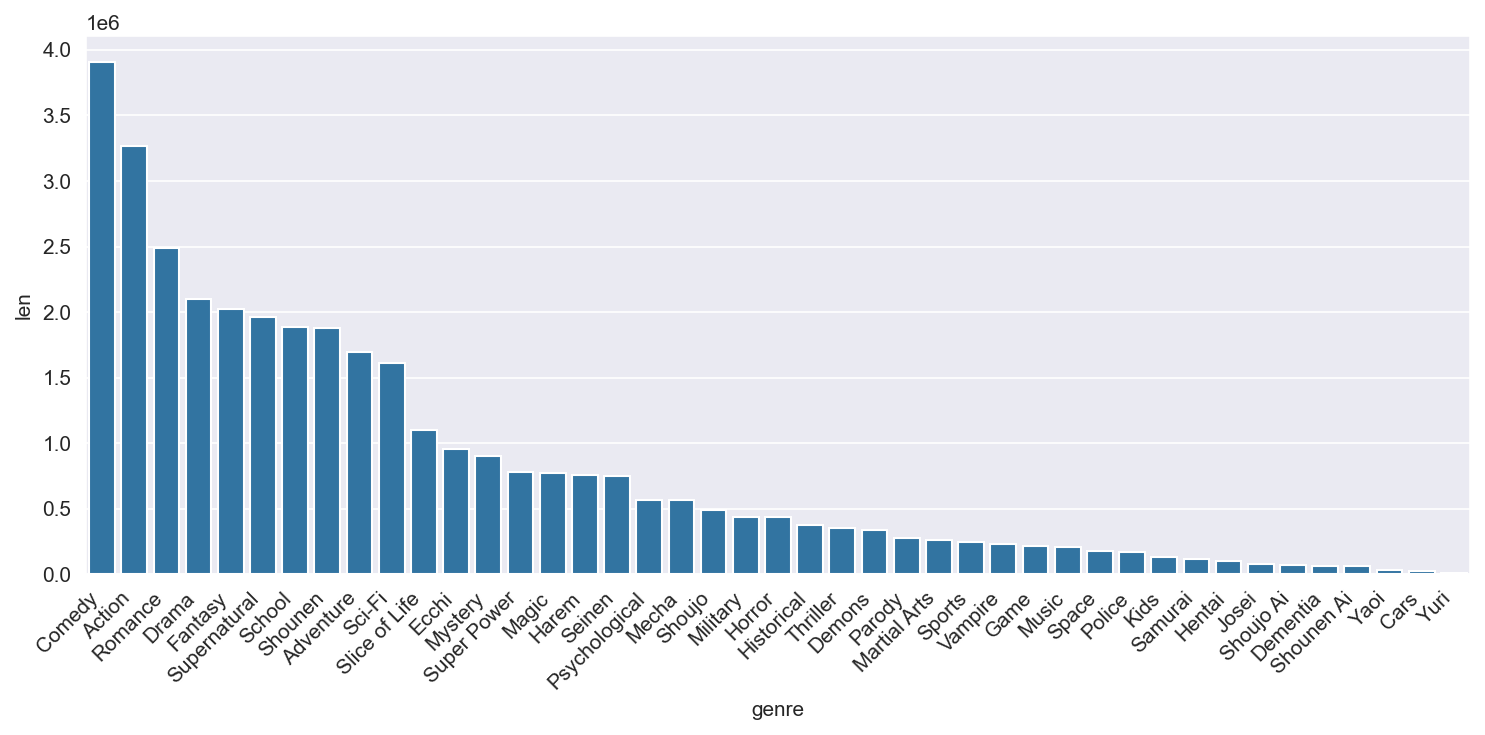

In [20]:
plt.figure(figsize=(10, 5), dpi=150)

most_popular_genres_pd = most_popular_genres.to_pandas()

sns.barplot(
    data=most_popular_genres_pd,
    x='genre',
    y='len'
)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
combined_df

anime_id,name,genre,type,episodes,rating,members,user_id,rating_right
u16,str,str,str,str,f32,u32,u32,i8
32281,"""Kimi no Na wa.""","""Drama""","""Movie""","""1""",9.37,200630,99,5
32281,"""Kimi no Na wa.""","""Romance""","""Movie""","""1""",9.37,200630,99,5
32281,"""Kimi no Na wa.""","""School""","""Movie""","""1""",9.37,200630,99,5
32281,"""Kimi no Na wa.""","""Supernatural""","""Movie""","""1""",9.37,200630,99,5
32281,"""Kimi no Na wa.""","""Drama""","""Movie""","""1""",9.37,200630,152,10
…,…,…,…,…,…,…,…,…
6133,"""Violence Gekiga Shin David no …","""Hentai""","""OVA""","""1""",4.98,175,39532,-1
6133,"""Violence Gekiga Shin David no …","""Hentai""","""OVA""","""1""",4.98,175,48766,-1
6133,"""Violence Gekiga Shin David no …","""Hentai""","""OVA""","""1""",4.98,175,60365,4


In [22]:
exact_duplicates = combined_df.group_by(
    ['user_id', 'anime_id', 'genre']
).len().filter(
    pl.col('len') > 1
)

In [23]:
exact_duplicates

user_id,anime_id,genre,len
u32,u16,str,u32
42653,2001,"""Adventure""",2
42653,22319,"""Psychological""",2
42653,16498,"""Shounen""",2
42653,1575,"""Super Power""",2
42653,11757,"""Adventure""",2
…,…,…,…
42653,22319,"""Action""",2
42653,23283,"""Psychological""",2
42653,11757,"""Action""",2


In [24]:
user_anime_genre_counts = combined_df.group_by(
    ['user_id', 'anime_id']
).agg([
    pl.col('genre').n_unique().alias('unique_genres'),
    pl.col('genre').len().alias('total_genre_rows')
])

In [25]:
user_anime_genre_counts

user_id,anime_id,unique_genres,total_genre_rows
u32,u16,u32,u32
68424,4898,7,7
21191,9041,5,5
32313,13759,5,5
51495,392,7,7
37512,22535,6,6
…,…,…,…
4810,4437,4,4
27261,10110,5,5
7432,355,6,6


In [26]:
combined_df.group_by(
    ['user_id', 'anime_id']
).agg([
    pl.col('rating_right').n_unique().alias('unique_ratings'),
    pl.col('rating_right').min().alias('min_rating'),
    pl.col('rating_right').max().alias('max_rating'),
    pl.col('genre').len().alias('genre_count'),
])

user_id,anime_id,unique_ratings,min_rating,max_rating,genre_count
u32,u16,u32,i8,i8,u32
40131,9756,1,-1,-1,4
3182,14833,1,-1,-1,5
58247,651,1,-1,-1,3
51792,1818,1,7,7,7
59192,641,1,-1,-1,4
…,…,…,…,…,…
16362,6948,1,7,7,3
27087,2167,1,10,10,6
67020,1887,1,10,10,4


In [27]:
combined_df.select(
    (pl.col(col).is_null().sum() / pl.len() * 100).alias(f"{col}_null_percentage")
    for col in combined_df.columns
)

anime_id_null_percentage,name_null_percentage,genre_null_percentage,type_null_percentage,episodes_null_percentage,rating_null_percentage,members_null_percentage,user_id_null_percentage,rating_right_null_percentage
f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.000401,0.000206,0.0,0.002039,0.0,0.007401,0.007401


In [28]:
genre_analysis = combined_df.select(
    'genre'
).group_by(
    'genre'
).len().sort(
    by='len', descending=True
)

genre_analysis

genre,len
str,u32
"""Comedy""",3909159
"""Action""",3263552
"""Romance""",2487946
"""Drama""",2101478
"""Fantasy""",2021538
…,…
"""Shounen Ai""",59724
"""Yaoi""",29170
"""Cars""",21340


In [29]:
genre_variations = combined_df.select(
    'genre'
).unique().sort(
    'genre'
)

genre_variations.to_pandas()['genre'].tolist()

[None,
 'Action',
 'Adventure',
 'Cars',
 'Comedy',
 'Dementia',
 'Demons',
 'Drama',
 'Ecchi',
 'Fantasy',
 'Game',
 'Harem',
 'Hentai',
 'Historical',
 'Horror',
 'Josei',
 'Kids',
 'Magic',
 'Martial Arts',
 'Mecha',
 'Military',
 'Music',
 'Mystery',
 'Parody',
 'Police',
 'Psychological',
 'Romance',
 'Samurai',
 'School',
 'Sci-Fi',
 'Seinen',
 'Shoujo',
 'Shoujo Ai',
 'Shounen',
 'Shounen Ai',
 'Slice of Life',
 'Space',
 'Sports',
 'Super Power',
 'Supernatural',
 'Thriller',
 'Vampire',
 'Yaoi',
 'Yuri']

In [30]:
combined_df.select(
    pl.col('genre')
).unique().to_series().to_list()

['Ecchi',
 'School',
 'Sports',
 'Mystery',
 'Military',
 'Martial Arts',
 'Shounen Ai',
 'Fantasy',
 'Yaoi',
 'Shounen',
 'Psychological',
 'Demons',
 None,
 'Police',
 'Super Power',
 'Samurai',
 'Horror',
 'Seinen',
 'Drama',
 'Historical',
 'Parody',
 'Comedy',
 'Josei',
 'Shoujo Ai',
 'Romance',
 'Hentai',
 'Dementia',
 'Yuri',
 'Slice of Life',
 'Vampire',
 'Harem',
 'Action',
 'Supernatural',
 'Kids',
 'Adventure',
 'Sci-Fi',
 'Space',
 'Thriller',
 'Game',
 'Music',
 'Magic',
 'Cars',
 'Mecha',
 'Shoujo']

In [31]:
combined_df.select(
    'genre'
).to_dict(as_series=False)

{'genre': ['Drama',
  'Romance',
  'School',
  'Supernatural',
  'Drama',
  'Romance',
  'School',
  'Supernatural',
  'Drama',
  'Romance',
  'School',
  'Supernatural',
  'Drama',
  'Romance',
  'School',
  'Supernatural',
  'Drama',
  'Romance',
  'School',
  'Supernatural',
  'Drama',
  'Romance',
  'School',
  'Supernatural',
  'Drama',
  'Romance',
  'School',
  'Supernatural',
  'Drama',
  'Romance',
  'School',
  'Supernatural',
  'Drama',
  'Romance',
  'School',
  'Supernatural',
  'Drama',
  'Romance',
  'School',
  'Supernatural',
  'Drama',
  'Romance',
  'School',
  'Supernatural',
  'Drama',
  'Romance',
  'School',
  'Supernatural',
  'Drama',
  'Romance',
  'School',
  'Supernatural',
  'Drama',
  'Romance',
  'School',
  'Supernatural',
  'Drama',
  'Romance',
  'School',
  'Supernatural',
  'Drama',
  'Romance',
  'School',
  'Supernatural',
  'Drama',
  'Romance',
  'School',
  'Supernatural',
  'Drama',
  'Romance',
  'School',
  'Supernatural',
  'Drama',
  'Roman

In [32]:
import re

def normalize_genre_name(genre_name):
    if genre_name is None:
        return None

    normalized = genre_name.lower().strip()

    variations = {
        'sci-fi': 's'
    }


In [33]:
def create_genre_taxonomy():
    genre_taxonomy = {
        'Action': ['Action', 'Fighting', 'Martial Arts', 'Military', 'Police'],
        'Adventure': ['Adventure', 'Space'],
        'Comedy': ['Comedy', 'Parody', 'Gag Humor'],
        'Drama': ['Drama', 'Melodrama'],
        'Fantasy': ['Fantasy', 'Magic', 'Supernatural', 'Mythology'],
        'Romance': ['Romance', 'Romantic Comedy', 'Harem', 'Reverse Harem'],
        'Science Fiction': ['Science Fiction', 'Sci-Fi', 'Mecha', 'Cyberpunk'],
        'Horror': ['Horror', 'Thriller', 'Suspense'],
        'Mystery': ['Mystery', 'Detective', 'Psychological'],
        'Slice of Life': ['Slice of Life', 'Iyashikei', 'School', 'Workplace'],
        'Sports': ['Sports', 'Racing', 'Competition'],
        'Demographic': ['Shonen', 'Shojo', 'Seinen', 'Josei', 'Kids'],
        'Mature': ['Ecchi', 'Mature', 'Adult'],
        'Historical': ['Historical', 'Samurai', 'Period Drama'],
        'Music': ['Music', 'Idol', 'Band'],
        'Game': ['Game', 'Video Game', 'Card Game'],
        'Other': ['Experimental', 'Avant Garde', 'Art House']
    }

    return genre_taxonomy


In [34]:
combined_df.select([
    'anime_id', 'name', 'rating', 'type', 'episodes', 'genre'
]).describe()

statistic,anime_id,name,rating,type,episodes,genre
str,f64,str,f64,str,str,str
"""count""",3.48751e7,"""34875100""",3.4874389e7,"""34875028""","""34875100""","""34874960"""
"""null_count""",0.0,"""0""",711.0,"""72""","""0""","""140"""
"""mean""",8458.635314,null,7.692898,null,null,null
"""std""",8850.838417,null,0.640518,null,null,null
"""min""",1.0,"""&quot;0&quot;""",1.67,"""Movie""","""1""","""Action"""
"""25%""",916.0,null,7.3,null,null,null
"""50%""",5258.0,null,7.7,null,null,null
"""75%""",13357.0,null,8.15,null,null,null
"""max""",34527.0,"""◯""",10.0,"""TV""","""Unknown""","""Yuri"""


# User Behavior Analytics
## 4. User Engagement Segmentation:

In [35]:
combined_df.select(
    pl.col('anime_id').n_unique().alias('anime_count')
)

anime_count
u32
12294
